### classification
- alexnet
- zfnet : 비주얼라이제이션에서 성능개선으로 발전/ 테크닉으로 모델 자체는 아님
- vggnet : 3 x 3
- googlenet : inception
- resnet : residual block

### detection
- rcnn (overfeat) : 기존보다 30% 높아짐
- sppnet : pooling
- fast-rcnn

### segmentation
- fcn

- convolution 을 하면 : features and locations
- multi-scale training : VGG 에서도 사용했음

### detection 에서 현재도 진행 되고 있는 3가지 이슈
- 속도
- imbalance
- 사이즈별 이슈

### Fast-RCNN 모델
- PASCAL VOC 데이타셋 사용
- 애노테이션 된 데이터셋을 불러온다

In [1]:
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
airplane = pd.read_csv('dataset/annotations/airplane.csv', header=None)

In [4]:
airplane.rename({0:'filename',1:'xmin',2:'ymin',3:'xmax',4:'ymax', 5:'target' }, axis=1, inplace=True)

In [5]:
airplane

,filename,xmin,ymin,xmax,ymax,target
0,image_0001.jpg,49,30,349,137,airplane
1,image_0002.jpg,59,35,342,153,airplane
2,image_0003.jpg,47,36,331,135,airplane
3,image_0004.jpg,47,24,342,141,airplane
4,image_0005.jpg,48,18,339,146,airplane
...,...,...,...,...,...,...
795,image_0796.jpg,57,27,356,118,airplane
796,image_0797.jpg,56,25,350,110,airplane
797,image_0798.jpg,59,25,354,110,airplane
798,image_0799.jpg,49,26,347,116,airplane


In [6]:
face = pd.read_csv('dataset/annotations/face.csv', header=None)
face.rename({0:'filename',1:'xmin',2:'ymin',3:'xmax',4:'ymax', 5:'target' }, axis=1, inplace=True)
face

,filename,xmin,ymin,xmax,ymax,target
0,image_0001.jpg,251,15,444,300,face
1,image_0002.jpg,106,31,296,310,face
2,image_0003.jpg,207,17,385,279,face
3,image_0004.jpg,102,55,303,328,face
4,image_0005.jpg,246,30,446,312,face
...,...,...,...,...,...,...
430,image_0431.jpg,119,16,327,262,face
431,image_0432.jpg,117,14,322,251,face
432,image_0433.jpg,193,24,400,281,face
433,image_0434.jpg,127,13,337,268,face


In [7]:
motorcycle = pd.read_csv('dataset/annotations/motorcycle.csv', header=None)
motorcycle.rename({0:'filename',1:'xmin',2:'ymin',3:'xmax',4:'ymax', 5:'target' }, axis=1, inplace=True)
motorcycle

,filename,xmin,ymin,xmax,ymax,target
0,image_0001.jpg,31,19,233,141,motorcycle
1,image_0002.jpg,32,15,232,142,motorcycle
2,image_0003.jpg,30,20,234,143,motorcycle
3,image_0004.jpg,30,15,231,132,motorcycle
4,image_0005.jpg,31,19,232,145,motorcycle
...,...,...,...,...,...,...
793,image_0794.jpg,47,44,218,133,motorcycle
794,image_0795.jpg,44,38,216,135,motorcycle
795,image_0796.jpg,47,40,217,141,motorcycle
796,image_0797.jpg,48,54,211,150,motorcycle


In [8]:
data = pd.concat([airplane, face, motorcycle], ignore_index=True)

In [9]:
data

,filename,xmin,ymin,xmax,ymax,target
0,image_0001.jpg,49,30,349,137,airplane
1,image_0002.jpg,59,35,342,153,airplane
2,image_0003.jpg,47,36,331,135,airplane
3,image_0004.jpg,47,24,342,141,airplane
4,image_0005.jpg,48,18,339,146,airplane
...,...,...,...,...,...,...
2028,image_0794.jpg,47,44,218,133,motorcycle
2029,image_0795.jpg,44,38,216,135,motorcycle
2030,image_0796.jpg,47,40,217,141,motorcycle
2031,image_0797.jpg,48,54,211,150,motorcycle


<AxesSubplot:ylabel='target'>

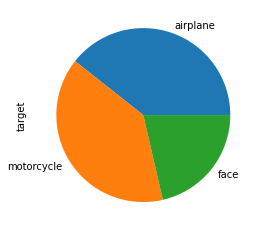

In [10]:
data.target.value_counts().plot.pie()

In [11]:
airplane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  800 non-null    object
 1   xmin      800 non-null    int64 
 2   ymin      800 non-null    int64 
 3   xmax      800 non-null    int64 
 4   ymax      800 non-null    int64 
 5   target    800 non-null    object
dtypes: int64(4), object(2)
memory usage: 37.6+ KB


In [12]:
ig = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [13]:
fig = ig.flow_from_dataframe(airplane, directory='dataset/images/airplane/', y_col='target') 
# classification용이 기본 사용
# classification 을 기본사용 지금 하려고 하는 것은 regresion

Found 800 validated image filenames belonging to 1 classes.


In [14]:
rig = ig.flow_from_dataframe(airplane, directory='dataset/images/airplane/', class_mode='raw',
                             y_col=['xmin','ymin','xmax','ymax'], target_size=(224,224))

Found 800 validated image filenames.


In [15]:
t = next(rig)

In [16]:
import matplotlib.pyplot as plt

In [17]:
import matplotlib.patches as pt

In [18]:
t[0][0][0][0]

array([1., 1., 1.], dtype=float32)

In [19]:
import imageio

In [20]:
d = imageio.imread('dataset/images/airplane/image_0003.jpg')

/var/folders/9k/jsf_2t1d6ts48d1mpfj3nxp00000gn/T/ipykernel_58546/1106939017.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  d = imageio.imread('dataset/images/airplane/image_0003.jpg')


In [21]:
d.shape

(165, 393, 3)

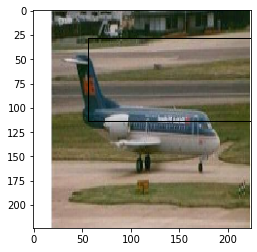

In [22]:
fig, ax = plt.subplots()
ax.imshow(t[0][0])
p = pt.Rectangle((t[1][0][0],t[1][0][1]), t[1][0][2] - t[1][0][0], t[1][0][3] - t[1][0][1], fill=None)
ax.add_patch(p)

In [23]:
vgg = tf.keras.applications.VGG16(include_top=False)
vgg.trainable = False

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-08-07 22:10:00.985909: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-07 22:10:00.986000: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [24]:
input_ = tf.keras.Input((224,224,3))
x = tf.keras.applications.vgg16.preprocess_input(input_)
x = vgg(x)
x = tf.keras.layers.GlobalAvgPool2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(4)(x)

In [25]:
model = tf.keras.Model(input_, x)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               65664 

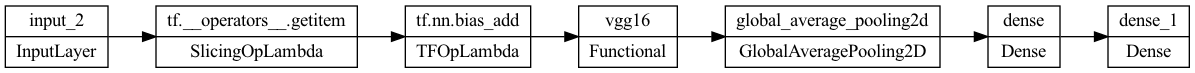

In [27]:
tf.keras.utils.plot_model(model, rankdir='LR')

In [28]:
temp = next(rig)

In [29]:
temp[1]

array([[ 56,  29, 354, 141],
       [ 54,  28, 348, 116],
       [ 54,  17, 339, 127],
       [ 57,  32, 343, 163],
       [ 51,  27, 348,  90],
       [ 52,  26, 345,  93],
       [ 52,  27, 340, 113],
       [ 54,  29, 349, 147],
       [ 48,  30, 335, 138],
       [ 46,  30, 344,  96],
       [ 50,  30, 349, 140],
       [ 50,  27, 351, 122],
       [ 56,  38, 339, 100],
       [ 52,  27, 349, 120],
       [ 58,  30, 350, 133],
       [ 54,  29, 332, 124],
       [ 54,  26, 359, 124],
       [ 57,  34, 352, 109],
       [ 57,  36, 348, 142],
       [ 64,  29, 350, 134],
       [ 58,  29, 351,  97],
       [ 60,  33, 357, 136],
       [ 52,  20, 345, 116],
       [ 43,  31, 344, 117],
       [ 48,  28, 344, 116],
       [ 51,  28, 345, 124],
       [ 62,  32, 354, 126],
       [ 66,  37, 347, 136],
       [ 44,  27, 343, 127],
       [ 53,  25, 348, 123],
       [ 56,  31, 346, 135],
       [ 49,  52, 332, 141]])

In [30]:
model(temp[0]).numpy() - temp[1]

array([[ -56.38383585,  -26.92581081, -351.90184021, -141.11110169],
       [ -54.3743335 ,  -25.94344282, -345.94700241, -116.06694156],
       [ -54.39934939,  -14.93723774, -336.96593046, -127.08219719],
       [ -57.385346  ,  -29.93573689, -340.96046686, -163.07269567],
       [ -51.393727  ,  -24.92781806, -345.9256227 ,  -90.11360183],
       [ -52.38001573,  -23.9453249 , -342.95323801,  -93.06148297],
       [ -52.39965969,  -24.93242383, -337.94289875, -113.08780289],
       [ -54.38634133,  -26.91725492, -346.94060588, -147.13520712],
       [ -48.41993988,  -27.91870856, -332.97410989, -138.12125772],
       [ -46.39498848,  -27.92801142, -341.91682529,  -96.13376263],
       [ -50.38537461,  -27.94066787, -346.94728279, -140.06692994],
       [ -50.38688052,  -24.93188739, -348.94598317, -122.06827444],
       [ -56.38336837,  -35.94723868, -336.94879794, -100.06997526],
       [ -52.38028693,  -24.94339895, -346.95658588, -120.06992471],
       [ -58.37741381,  -27.940803

In [31]:
model.compile(loss=tf.keras.losses.MSE)

In [32]:
model.fit(rig, epochs=5)

Epoch 1/5


2022-08-07 22:10:03.254772: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-07 22:10:03.661173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 15s 542ms/step - loss: 33033.6016
Epoch 2/5
25/25 [==============================] - 13s 529ms/step - loss: 29837.9766
Epoch 3/5
25/25 [==============================] - 13s 525ms/step - loss: 26341.7500
Epoch 4/5
25/25 [==============================] - 13s 526ms/step - loss: 22538.5625
Epoch 5/5
25/25 [==============================] - 13s 528ms/step - loss: 18658.8418
